### NAME - MOHIT NAGAR

### ROLL NUMBER - 1905474

### TOOL AND TECHNOLOGY LAB MINI PROJECT - HOUSE PRICE PREDICTION

### Importing the Dependencies

In [1]:
import numpy as np #USED TO PERFORM A WIDE VARIETY OF MATHEMATICAL OPERATIONS ON ARRAYS
import pandas as pd #USED FOR DATA MANIPULATION AND ANALYSIS
import matplotlib.pyplot as plt #USED FOR DATA VISUALIZATION
%matplotlib inline #TURNS ON INLINE PLOTTING
import seaborn as sns #USED FOR MAKING SATISTICAL GRAPHS
import sklearn.datasets #USED TO LOAD DATASETS
from sklearn.model_selection import train_test_split #IMPORTING TRAIN TEST SPLIT
from sklearn import metrics #FOR ACCURACY AND PRECISION

### Importing the Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

In [3]:
#Printing the dataset
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Printing all features name of our dataset
house_price_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [6]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Print Last 5 rows of our DataFrame
house_price_dataframe.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
# add the target (price) column to the DataFrame i.e labels
house_price_dataframe['price'] = house_price_dataset.target

### Detailed information of the dataframe

In [9]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [11]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [12]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###  Plotting a histogram for each numerical attribute

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

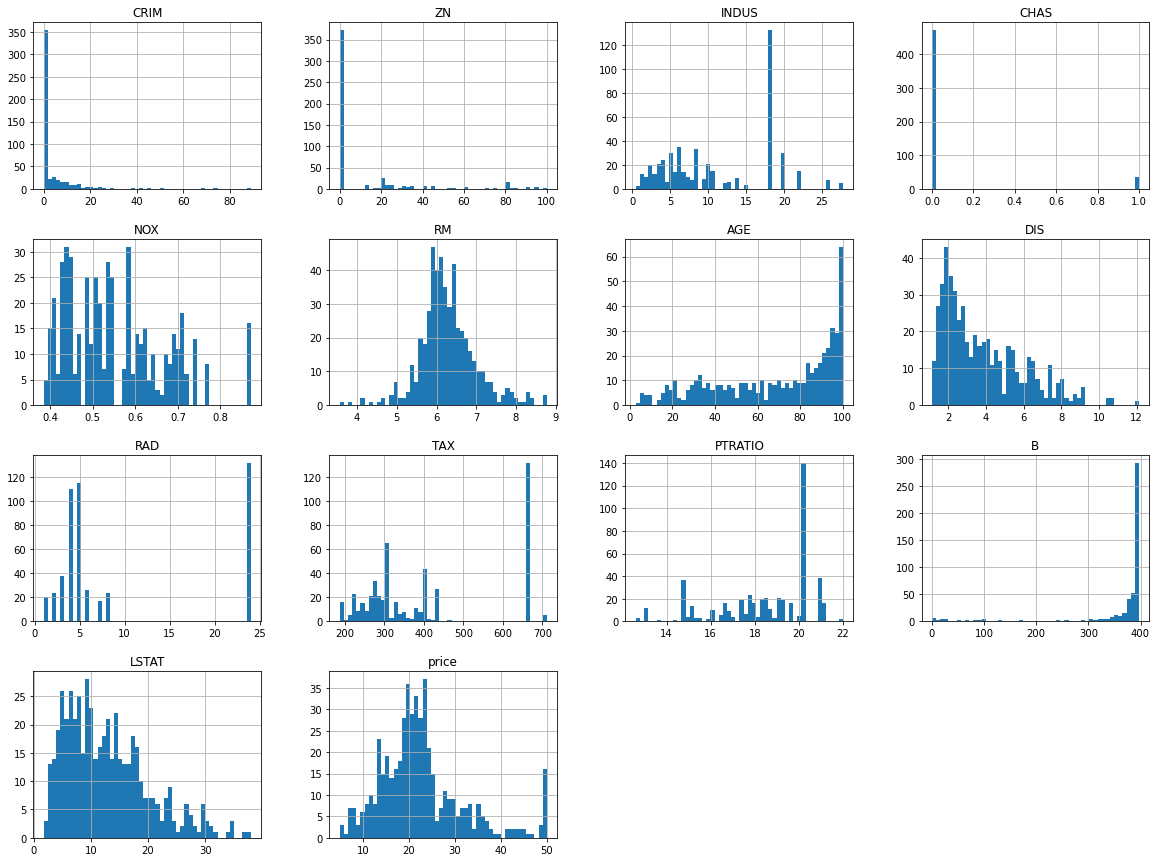

In [13]:
house_price_dataframe.hist(bins=50,figsize=(20,15))

### Understanding the correlation between various features in the dataset

### 1. Positive Correlation

### 2. Negative Correlation

In [14]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

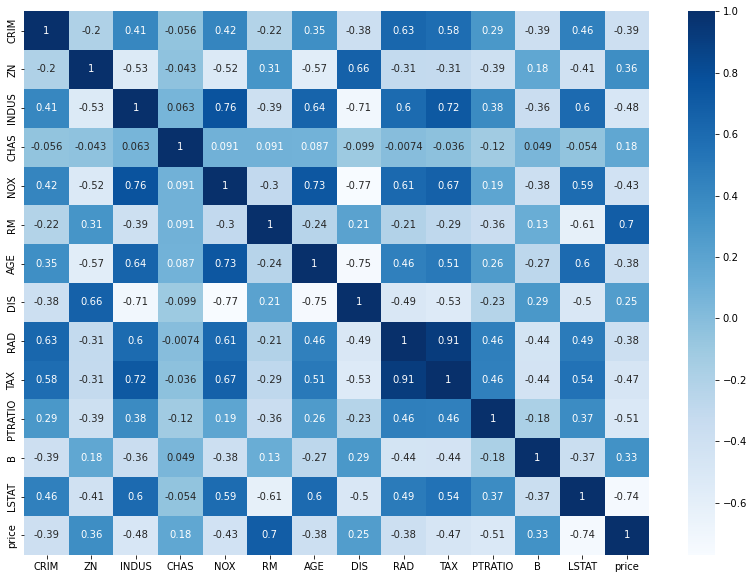

In [15]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=True,cmap='Blues')

### Splitting the dataframe into data(features) and Target(labels) ---->

In [16]:
#features of our dataframe
X = house_price_dataframe.drop(['price'], axis=1)
#label of our dataframe
Y = house_price_dataframe['price']

In [17]:
X  #features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
Y  #labels

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

### Splitting the data into Training data and Test data ---->

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
# Here we are taking 80 percentage of out data for traning our model and rest 20 percentage for testing

In [20]:
#Printing shape of our datasets in (ROWS,COLUMNS) format
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Checking for the datatypes for train and test sets --->

In [21]:
X_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [22]:
Y_train.dtypes

dtype('float64')

In [23]:
X_test.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [24]:
Y_test.dtypes

dtype('float64')

### Model Training

### 1.Linear Regression

#### In the most simple words, Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

In [25]:
#importing the Linear Regression from sklearn library
from sklearn.linear_model import LinearRegression
# loading the model
model = LinearRegression()

In [26]:
# training the model with training data
model.fit(X_train, Y_train)

LinearRegression()

### Evaluation

### Prediction on training data

In [27]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [28]:
#values predicted by our model
#print(training_data_prediction)

In [29]:
#mean of the predicted training data
training_data_prediction.mean()

22.44133663366337

In [30]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7285831776605591
Mean Absolute Error :  3.384457539916797


### Visualizing the actual Prices and predicted prices for train data ---->



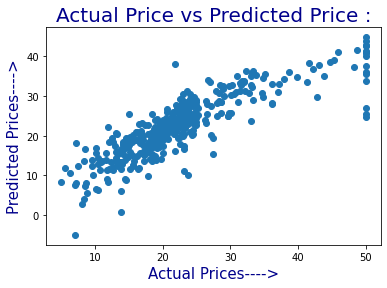

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### Prediction on Test Data

In [32]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [33]:
#test_data_prediction

In [34]:
#mean of the predicted test data
test_data_prediction.mean()

23.278301446783615

In [35]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7789207451814422
Mean Absolute Error :  3.1130437468934176


### Visualizing the actual Prices and predicted prices for test data ---->

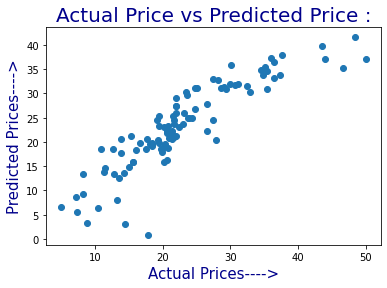

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### 2. Support Vector Regression(SVR) ---->

#### Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line.

In [37]:
from sklearn.svm import SVR
# loading the model
#model = XGBRegressor()
model = SVR()

In [38]:
# training the model with training data
model.fit(X_train, Y_train)

SVR()

### Evaluation

### Prediction on training data

In [39]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [40]:
#values predicted by our model
#print(training_data_prediction)

In [41]:
#mean of the predicted training data
training_data_prediction.mean()

20.345523043573685

In [42]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.17964669464989047
Mean Absolute Error :  5.21736190221409


### Visualizing the actual Prices and predicted prices for train data ---->

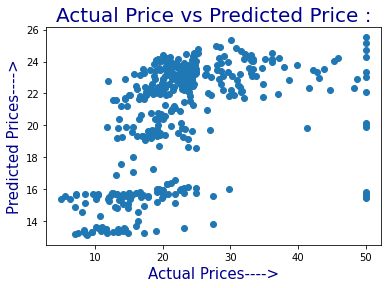

In [43]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### Prediction on Test Data

In [44]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [45]:
#test_data_prediction

In [46]:
#mean of the predicted test data
test_data_prediction.mean()

20.627535629450275

In [47]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.2749755336369747
Mean Absolute Error :  5.631655873506465


### Visualizing the actual Prices and predicted prices for test data ---->

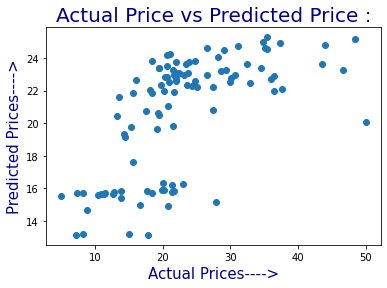

In [48]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### 3.  XGBoost or Extreme Gradient Boost Regression ---->

#### XGBoost is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting. XGBoost stands for Extreme Gradient Boosting. It uses more accurate approximations to find the best tree model.

In [49]:
#importing the XGBRegressor from xgboost library
from xgboost import XGBRegressor
# loading the model
model = XGBRegressor()

In [50]:
# training the model with training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Evaluation

### Prediction on training data

In [51]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [52]:
#values predicted by our model
#print(training_data_prediction)

In [53]:
#mean of the predicted training data
training_data_prediction.mean()

22.441359

In [54]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999948236320982
Mean Absolute Error :  0.0145848437110976


### Visualizing the actual Prices and predicted prices for train data ---->

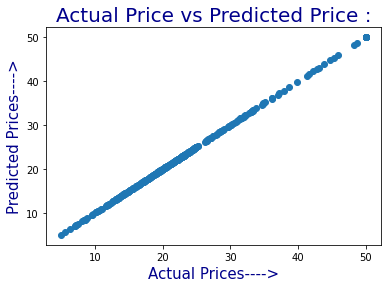

In [55]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### Prediction on Test Data ---->

In [56]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [57]:
#test_data_prediction

In [58]:
#mean of the predicted test data
test_data_prediction.mean()

22.82339

In [59]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8711660369151691
Mean Absolute Error :  2.2834744154238233


### Visualizing the actual Prices and predicted prices for test data ---->

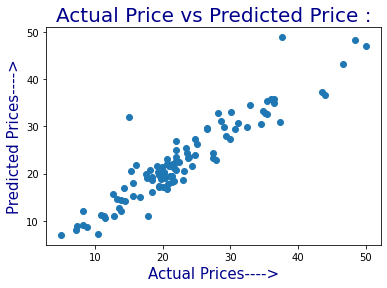

In [60]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices---->",color='darkblue',fontsize=15)
plt.ylabel("Predicted Prices---->",color='darkblue',fontsize=15)
plt.title("Actual Price vs Predicted Price :",color='darkblue',fontsize=20)
plt.show()

### In this project we have used three regression models namely Linear Regression,Support Vector Regression and Extreme Gradient Boost Regression  but we are getting best results in case of XGBoost or Extreme Gradient Boost Regression Model.

### MOHIT NAGAR
### 1905474
### T&T LAB PROJECT